<a href="https://colab.research.google.com/github/s1c5000/tensorflow2.0/blob/main/%EA%B8%B0%EC%B4%881~3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

랜덤값

In [ ]:
# random.uniform([shape], 최솟값, 최대값)
rand = tf.random.uniform([1],0,1)
print(rand)

tf.Tensor([0.494246], shape=(1,), dtype=float32)


In [ ]:
rand = tf.random.uniform([5],0,1)
print(rand)

tf.Tensor([0.22041905 0.25232983 0.82941544 0.70827806 0.04216409], shape=(5,), dtype=float32)


In [ ]:
#random.normal([shape], 정규분포 평균, 정규분포 표준편차)
rand = tf.random.normal([5],0,1)
print(rand)

tf.Tensor([ 0.04681498  0.0274772  -1.2693942  -2.302682   -0.64477664], shape=(5,), dtype=float32)


뉴런만들기

In [ ]:
import math
def sigmoid(x):
  return 1/ (1+math.exp(-x))

In [ ]:
x = 1
y = 0
w = tf.random.normal([1],0,1)
output = sigmoid(x*w)
print(output)

0.7997781409676493


경사 하강법       
w = w + x * $a$ * error

In [ ]:
for i in range(1000):
  output = sigmoid(x*w)
  error = y - output
  w = w + x * 0.1 * error

  if i % 100 == 99:
    print(i, error, output)

99 -0.1262112744548919 0.1262112744548919
199 -0.05842195360835836 0.05842195360835836
299 -0.03749041937866712 0.03749041937866712
399 -0.027496238039186643 0.027496238039186643
499 -0.021674752987603445 0.021674752987603445
599 -0.017873238549519818 0.017873238549519818
699 -0.015199201969895933 0.015199201969895933
799 -0.013217335282307043 0.013217335282307043
899 -0.01169041437860836 0.01169041437860836
999 -0.010478327429079897 0.010478327429079897


error 값이 0에 가까워 지는 것을 볼 수 있다.



---
입력으로 0을 넣었을때 출력으로 1을 얻는 뉴런


In [ ]:
x = 0 # 1 넣으면 학습된다.
y = 1
w = tf.random.normal([1], 0, 1)

for i in range(1000):
  output = sigmoid(x * w)
  error = y - output
  w = w + x * 0.1 * error

  if i % 100 == 99:
    print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


x = 0 이기때문에 w 에 더해지는 값이 없다.     
이러한 경우를 방지하기위해 편향(bias)값을 넣는다.     
편향은 늘 한쪽으로 치우친 고정값(예:1)을 받아서 입력으로 0을 받았을때 뉴런이 아무것도 배우지 못하는 상황을 방지한다.(bias값은 1이고, 가중치값이 바뀐다)

In [ ]:
x = 0
y = 1
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)

for i in range(1000):
  output = sigmoid(x * w + 1 * b) # 입력이 0이여서 학습이 안되는걸 막아준다.
  error = y - output
  w = w + x * 0.1 * error
  b = b + 1 * 0.1 * error

  if i % 100 == 99:
    print(i, error, output) # error는 0에 가까워지고, output은 1에 가까워진다.

99 0.08098657685693644 0.9190134231430636
199 0.045931498216451594 0.9540685017835484
299 0.03183827896487412 0.9681617210351259
399 0.024304587721116544 0.9756954122788835
499 0.01963212476282794 0.9803678752371721
599 0.01645655570474025 0.9835434442952598
699 0.014160119742673727 0.9858398802573263
799 0.012423147602727225 0.9875768523972728
899 0.011063960743409651 0.9889360392565903
999 0.009971705112123752 0.9900282948878762


 [And 연산]

In [ ]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1], [0], [0], [0]])

w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b) # 1*2 행렬에 tf의변수 2개를 각각 곱한거로 본다. (행렬곱이랑 다름)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i %200 == 199:
    print(i , error_sum)

199 -0.10073502037033058
399 -0.06219498051972102
599 -0.04485324645149236
799 -0.03497735158102241
999 -0.028616655209103416
1199 -0.0241875418955561
1399 -0.020930785881918882
1599 -0.018437109595270857
1799 -0.01646936635214764
1999 -0.01487655437928454


In [ ]:
a = np.array([[2,2],[3,3],[4,4]])
print(a) # 3*2행렬
b = tf.random.normal([2],0,1)
print(b)
print(b.shape)#(2,)
print(a*b) # 3*2  *  2*1 행렬이 되는게 아니고 그냥 열에맞춰서 곱해진다.

[[2 2]
 [3 3]
 [4 4]]
tf.Tensor([ 0.9754484  -0.58888704], shape=(2,), dtype=float32)
(2,)
tf.Tensor(
[[ 1.9508969 -1.1777741]
 [ 2.9263453 -1.7666612]
 [ 3.9017937 -2.3555481]], shape=(3, 2), dtype=float32)


In [ ]:
for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'output:',sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] output: 0.9652718009755784
X: [1 0] Y: [0] output: 0.02461253847909739
X: [0 1] Y: [0] output: 0.024687009844861225
X: [0 0] Y: [0] output: 2.2978749155944435e-05


실제 출력과 가깝게 나온다

[OR연산]

In [ ]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1], [1], [1], [0]])

w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b) # 1*2 행렬에 tf의변수 2개를 각각 곱한거로 본다. (행렬곱이랑 다름)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i %200 == 199:
    print(i , error_sum)

199 -0.052690988195250726
399 -0.02674540194918268
599 -0.01779490330979032
799 -0.013283392096547886
999 -0.010576393664130913
1199 -0.008776397256153569
1399 -0.007495145519198554
1599 -0.006537245537461031
1799 -0.005794962388777164
1999 -0.00520192859926516


In [ ]:
for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'output:',sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] output: 0.9999971190130873
X: [1 0] Y: [1] output: 0.9896880749613962
X: [0 1] Y: [1] output: 0.9896626901269859
X: [0 0] Y: [0] output: 0.025788930503498928


[XOR연산]

In [ ]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0], [1], [1], [0]])

w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b) # 1*2 행렬에 tf의변수 2개를 각각 곱한거로 본다. (행렬곱이랑 다름)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i %200 == 199:
    print(i , error_sum)

199 0.0019954102355798087
399 8.11117246358739e-05
599 3.2947173519426443e-06
799 1.3867587389526648e-07
999 3.722842145670313e-09
1199 1.8614210173240053e-09
1399 1.8614210173240053e-09
1599 1.8614210173240053e-09
1799 1.8614210173240053e-09
1999 1.8614210173240053e-09


에러값이 줄어들다가 어느순간부터 줄지 않는다.

In [ ]:
for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'output:',sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] output: 0.5128176323940516
X: [1 0] Y: [1] output: 0.5128176314633411
X: [0 1] Y: [1] output: 0.4999999990686774
X: [0 0] Y: [0] output: 0.49999999813735485


y와 output이 큰 차이가 있는게 보인다.    
w와 b를 출력해보면

In [ ]:
print('W:', w)
print('b:',b)

W: tf.Tensor([5.1281769e-02 3.7252903e-09], shape=(2,), dtype=float32)
b: tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32)


w는 0.0512, -0.00000000745이고 ,b는 0.000000000373이다.     
w에 순차적으로 x가 곱해지기때문에 첫번째 입력이 두번재 입력보다 큰 영향을 끼치고, 편향도 거의 영향이 없는 것을 알 수 있다. 

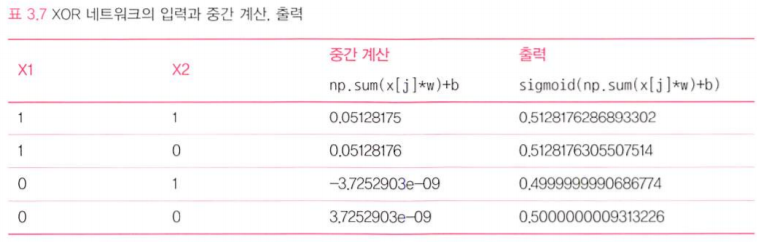

중간계산값이 0에 가까워지기때문에 최종 출력이 0.5에 가까워진다.     
반면 AND의 w와 b를 출력해보면

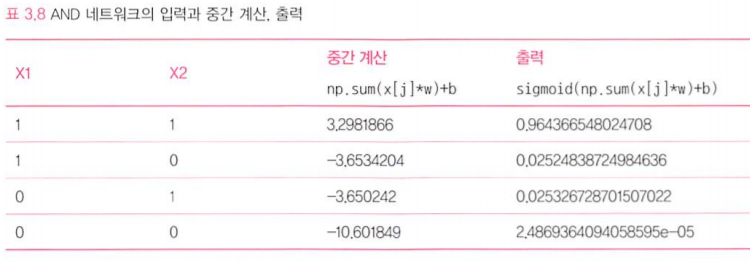

두 네트워크의 가중치를 비교해보면 다음과 같다      
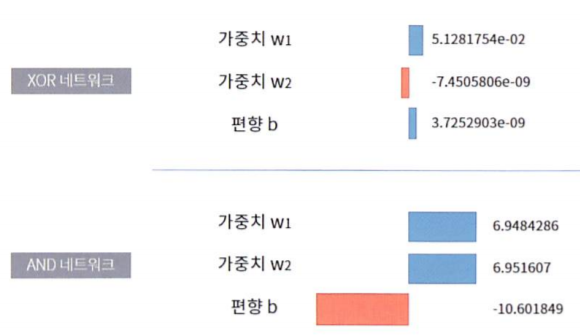

AND네트워크의 가중치는 XOR의 네트워크에 비해 분명하다.      
두개의 가중치가 비슷하기 때문에 입력2개는 서로 거의 비슷한 중요도를 가진다.      
편향값은 큰 음수인데 이것은 중간계산값을 음수로 보내는 경향을 가진다. 두 가중치를 모두 합쳐야 음수 평향을 이겨낼 수 있다.     
반면 XOR가중치는 명확하지않다. 시그모이드를 취하면 0.5에 가까워질뿐이다      
해당 문제로인해 인공지능은 첫번째 겨울을 맞았다.

그 해결책으로는 여러개의 퍼셉트론을 사용하는 것이다.    
여러개의 퍼셉트론을 사용하면 어떤 논리문제든 풀수있는게 증명되었다.

In [ ]:
import numpy as np

x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
      tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
      tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


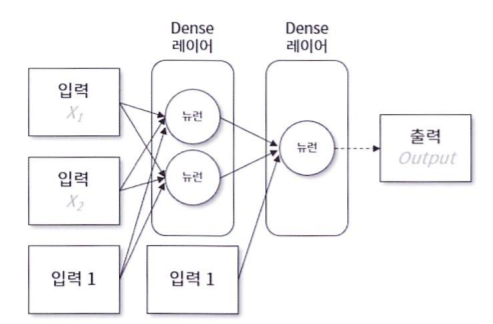

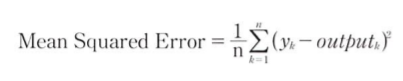

In [ ]:
history = model.fit(x,y,epochs=2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2487
Epoch 2/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2488
Epoch 3/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2488
Epoch 4/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2488
Epoch 5/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2486
Epoch 6/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2487
Epoch 7/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2487
Epoch 8/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2485
Epoch 9/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2486
Epoch 10/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2485
Epoch 11/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2485
Epoch 12/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2484
Epoch 13/2000
4/4 [==============================

In [ ]:
model.predict(x)

array([[0.5165736 ],
       [0.49673486],
       [0.87854016],
       [0.08418822]], dtype=float32)

In [ ]:
for weight in model.weights:
  print(weight)

<tf.Variable 'dense_6/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-5.448075 ,  4.9924784],
       [-4.0595922, -2.2201824]], dtype=float32)>
<tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32, numpy=array([0.6174927, 1.3250709], dtype=float32)>
<tf.Variable 'dense_7/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-4.6605973],
       [-2.9645658]], dtype=float32)>
<tf.Variable 'dense_7/bias:0' shape=(1,) dtype=float32, numpy=array([2.9830713], dtype=float32)>


가중치 정보는 model.weights에 저장되어있다. 입력과 레이어 또는 레이어 사이의 뉴런을 연결할 때 사용되는 가중치는 kernal이고, 편향과 연결된 가중치는 bias로 표시된다.     



가중치들을 이름이 부여된다

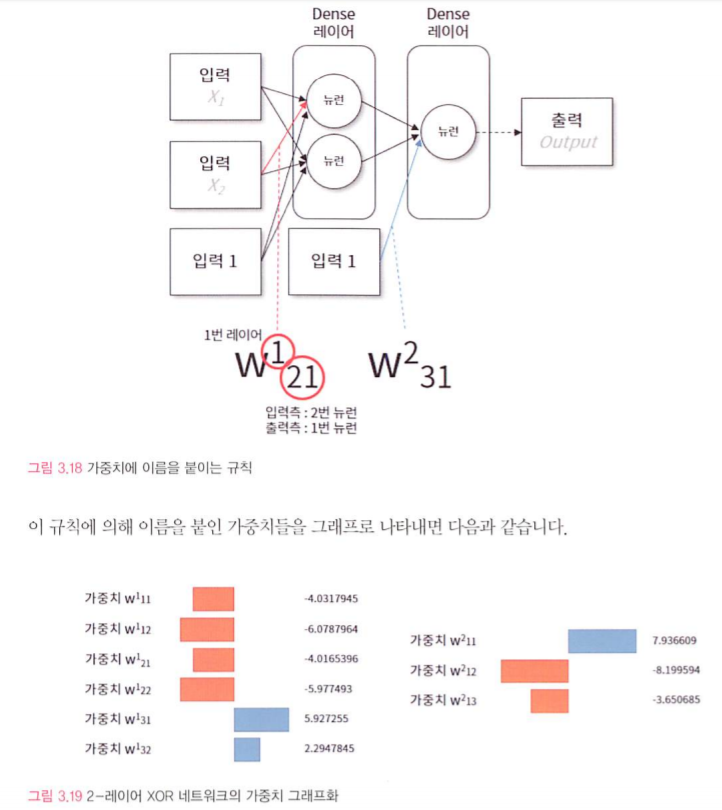

앞에서 본 1개의 뉴런, 1개의 레이어를 사용한 XOR, AND와는 다르게 뉴런 개수가 3개, 레이어 개수가 2개로 늘자 이 가중치들이 무슨 일을 하는지 한눈에 잘 들어오지 않는다. 뉴런과 레이어의 개수가 많아지면 이러한 문제는 더욱 커진다.

## 3.4 시각화 기초

### 3.4.1 matplotlib.pyplot을 이용한 그래프그리기

In [ ]:
import matplotlib.pyplot as plt

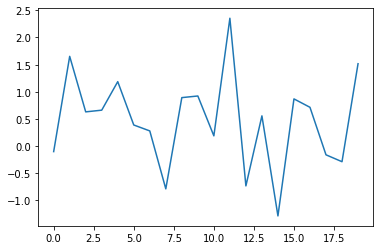

In [ ]:
x = range(20)
y = tf.random.normal([20],0.1)
plt.plot(x,y)
plt.show()

시각화를 위해선 matplotlib.pyplot을 임포트 해야한다.    
plt.plot(x,y)는 x축 y축에 각각 x,y를 넣어서 그래프를 그리는 부분이다.

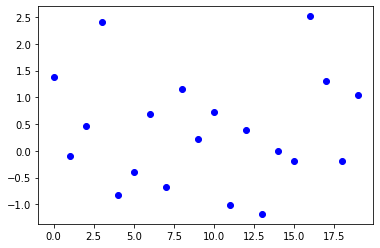

In [ ]:
x = range(20)
y = tf.random.normal([20],0.1)
plt.plot(x,y,'bo') # 점으로 바꾸려면 'bo' 붙인다. blue, 점(o)
plt.show()

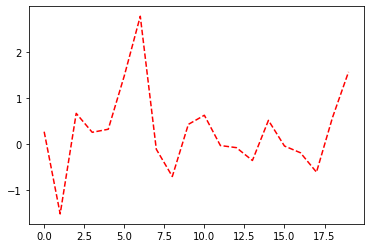

In [ ]:
x = range(20)
y = tf.random.normal([20],0.1)
plt.plot(x,y,'r--') # red, 점선(--)
plt.show()

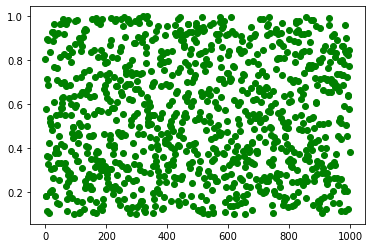

In [ ]:
x = range(1000)
y = tf.random.uniform([1000],0.1)
plt.plot(x,y,'go') # red, 점선(--)
plt.show()

또 유용한 그래프는 히스토그램이다. 

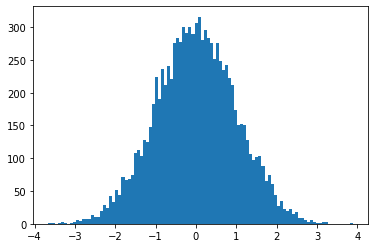

In [ ]:
random_normal = tf.random.normal([10000],0,1) # 평균이 0, 표준편차가 1인 난수생성
plt.hist(random_normal, bins=100)
plt.show()

10000개의 난수를 생성한뒤 히스토그램을 만들었다. bins는 데이터를 얼마나 많은 수의영역으로 나눌지 정의하는 것이다.      
100개의 영역에 대해 각각 데이터의 수인 도수를 계산한 뒤에 막대그래프로 그려준다

### 3.4.2 레이어 XOR네트워크의 정보 시각화

딥러닝을 학습시킬때 가장 많이 보게 될 그래프는 바로 학습이 잘 되고 있는지를 확인하기위한 측정치 변화량을 나타내는 선 그래프이다.     
위의 XOR문제에서 fit()을 통해 history라는 변수에 tf.keras가 학습을 진행한 내역을 저장했다. 여기에 저장되는 정보중 loss를 불러와서 그래프를 그릴 수있다.

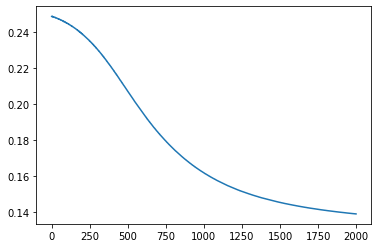

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

손실이 처음 서서히 감소하다가 어느시전부터 급격히 감소하고 나중에는 거의 감소하지않는 뒤집힌 S자 모양을 하고있다.  이렇게 손실을 시각화하면 네트워크의 학습현황을 한눈에 볼 수 있다.      
참고로 plt.plot()에 하나의 변수만 전달하면 그변수를 y로 간주하고 x는 자동으로 range(len(y))에 해당하는 값을 넣는다.